# Coursera - Capstone Project for IBM Data Science Certificate
"The battle of the neighborhoods" by SAJITH M PADMAKUMARI

This is the final assignment the Coursera Capstone Project - Week1

https://www.coursera.org/learn/applied-data-science-capstone/peer/60zST/capstone-project-the-battle-of-neighborhoods-week-1

Objective: Explore the best neighborhood in Brooklyn NY for opening a new restaurant . 
Choices to be explored are Location & type of Restaurant - Indian or Italian

Data Sources:  'newyork_data.json' https://cocl.us/new_york_dataset

My GitHub repository

https://github.com/mpsajith/Coursera_Capstone/tree/3373cd58b539e3b8fcce86f543ca0649d57506a8

## Table of Content

#### SOLUTION DESIGN & APPROACH
##### Solution is approached in the following steps as listed below 
###### Step 1 - Create initial dataframe NYneighborhoods with 5 Borouhs across 306 neighborhoods. 
###### Step2 - Narrow down pointer to One of the Boroughs Brooklyn & its 70 Neighbourhoods - Mapping those Neighbourhoods on a map.
###### Step 3 - EXPLORING the NEIGHBOURHOODS of BROOKLYN USING FOURSQUARE APIS.
###### Step 4 - Venue clustering by neighborhood and analysis of 'best' fit for new location.

In [1]:
# CAPSTONE FINAL PROJECT _ EXPLORING THE BEST POSSIBLE LOCATION FOR AN INDIAN RESTAURANT AT BROOKLYN

# STEP 1 - STARTS

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)


In [4]:
NYnghhood_data = newyork_data['features']
NYnghhood_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [5]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
NYneighborhoods = pd.DataFrame(columns=column_names)
NYneighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [6]:
for data in NYnghhood_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    NYneighborhoods = NYneighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [69]:
NYneighborhoods.head()
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(NYneighborhoods['Borough'].unique()),
        NYneighborhoods.shape[0]
    )
)
NYneighborhoods.head()
# STEP 1 Completes

The dataframe has 5 boroughs and 306 neighborhoods.


,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


### STEP 2 - Narrowing down to One of the Boroughs - Brooklyn Basis of Population/Density

In [8]:
import pandas as pd
import requests
from bs4 import BeautifulSoup 
from io import StringIO 
# Webscrapping the URL
url = "https://en.wikipedia.org/wiki/Demographics_of_New_York_City"
page = requests.get(url)
print(page.status_code)
soup = BeautifulSoup(page.text,"html.parser")

200


In [9]:
# READ Table
Table_array = []
Table_text_element = soup.find_all( class_= "wikitable sortable")
#print (Table_text_element[0])
Table_text_element=Table_text_element[0]
for row in Table_text_element.find_all('tr'):
       for cell in row.find_all('td'):
             Table_array.append(cell.text)
Table_array1string=''.join(Table_array)
Table_array1string = "Heading\n"+Table_array1string
Table_array1string = StringIO(Table_array1string)
df = pd.read_csv(Table_array1string, sep="\n") 
df.drop([45,46,47],axis=0,inplace=True)
df = pd.DataFrame(df.Heading.values.reshape(-1, 9), columns=['Borough', 'County', 'Population Est(2017)',"GDP-USD-Billions","Per-Capita-USD","LandArea-SqMile","LandArea-SqKM","Density-SqMiles","Density-SqMiles"])
df.shape
df

,Borough,County,Population Est(2017),GDP-USD-Billions,Per-Capita-USD,LandArea-SqMile,LandArea-SqKM,Density-SqMiles,Density-SqMiles
0,The Bronx,Bronx,"1,471,160",28.787,"19,570",42.10,109.04,"34,653","13,231"
1,Brooklyn,Kings,"2,648,771",63.303,"23,900",70.82,183.42,"37,137","14,649"
2,Manhattan,New York,"1,664,727",629.682,"378,250",22.83,59.13,"72,033","27,826"
3,Queens,Queens,"2,358,582",73.842,"31,310",108.53,281.09,"21,460","8,354"
4,Staten Island,Richmond,"479,458",11.249,"23,460",58.37,151.18,"8,112","3,132"


### Narrowing down to One of the Boroughs - Brooklyn & its 70 Neighbourhoods  

In [10]:
# STEP 3 - STARTS
brooklyn_data = NYneighborhoods[NYneighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
brooklyn_data.head()


,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


In [11]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(brooklyn_data['Borough'].unique()),
        brooklyn_data.shape[0]
    )
)

The dataframe has 1 boroughs and 70 neighborhoods.


In [12]:
address = 'Brooklyn, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.


In [13]:
# create map of Brooklyn using latitude and longitude values
map_brooklyn = folium.Map(location=[latitude, longitude], zoom_start=11)

# Add markers to map
for lat, lng, label in zip(brooklyn_data['Latitude'], brooklyn_data['Longitude'], brooklyn_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_brooklyn)  
    
map_brooklyn
# STEP 3 - Completes

### STEP 4 -  EXPLORING the NEIGHBOURHOODS of BROOKLYN USING FOURSQUARE APIS.

In [14]:
# STEP 4 - STARTS

# EXPLORING the NEIGHBOURHOODS of Brooklyn USING FOURSQUARE APIS
CLIENT_ID = 'AV2RXHWVXPVA2W4UAFKRNVMEINKR3U2RAQYF2XBVARV3U0PG' # your Foursquare ID
CLIENT_SECRET = 'PJIWCB43CE1JXMLIXKSCVWNOQ2HM130004DB0KOQX5MHHXEB' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AV2RXHWVXPVA2W4UAFKRNVMEINKR3U2RAQYF2XBVARV3U0PG
CLIENT_SECRET:PJIWCB43CE1JXMLIXKSCVWNOQ2HM130004DB0KOQX5MHHXEB


In [15]:
brooklyn_data.loc[0, 'Neighborhood']

'Bay Ridge'

In [16]:
neighborhood_latitude = brooklyn_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = brooklyn_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = brooklyn_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Bay Ridge are 40.625801065010656, -74.03062069353813.


In [17]:
LIMIT = 250 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=AV2RXHWVXPVA2W4UAFKRNVMEINKR3U2RAQYF2XBVARV3U0PG&client_secret=PJIWCB43CE1JXMLIXKSCVWNOQ2HM130004DB0KOQX5MHHXEB&v=20180605&ll=40.625801065010656,-74.03062069353813&radius=500&limit=250'

In [18]:
brooklynresults = requests.get(url).json()
brooklynresults

{'meta': {'code': 200, 'requestId': '5d919ed9c58ed7002c8d77b1'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bay Ridge',
  'headerFullLocation': 'Bay Ridge, Brooklyn',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 85,
  'suggestedBounds': {'ne': {'lat': 40.63030106951066,
    'lng': -74.02470273356597},
   'sw': {'lat': 40.62130106051065, 'lng': -74.03653865351028}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b895827f964a5206c2d32e3',
       'name': 'Pilo Arts Day Spa and Salon',
       'location': {'address': '8412 3rd Ave',
        'lat': 40.62474788273414,
        'lng': -74.03059056940135,
        'labeledLatL

In [19]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [20]:
venues = brooklynresults['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.insert(0, 'neighborhood', 'Bay Ridge')

nearby_venues.head(50)


,neighborhood,name,categories,lat,lng
0,Bay Ridge,Pilo Arts Day Spa and Salon,Spa,40.624748,-74.030591
1,Bay Ridge,Bagel Boy,Bagel Shop,40.627896,-74.029335
2,Bay Ridge,Cocoa Grinder,Juice Bar,40.623967,-74.030863
3,Bay Ridge,Pegasus Cafe,Breakfast Spot,40.623168,-74.031186
4,Bay Ridge,Ho' Brah Taco Joint,Taco Place,40.622960,-74.031371
5,Bay Ridge,Brooklyn Market,Grocery Store,40.626939,-74.029948
6,Bay Ridge,Georgian Dream Cafe and Bakery,Caucasian Restaurant,40.625586,-74.030196
7,Bay Ridge,The Bookmark Shoppe,Bookstore,40.624577,-74.030562
8,Bay Ridge,Karam,Middle Eastern Restaurant,40.622931,-74.028316
9,Bay Ridge,Mimi Nails,Spa,40.622571,-74.031477


In [21]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

85 venues were returned by Foursquare.


In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [61]:
brooklyn_venues = getNearbyVenues(names=brooklyn_data['Neighborhood'],
                                   latitudes=brooklyn_data['Latitude'],
                                   longitudes=brooklyn_data['Longitude']
                                  )

Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus


In [62]:
print(brooklyn_venues.shape)
brooklyn_venues.head()

(2838, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,Pilo Arts Day Spa and Salon,40.624748,-74.030591,Spa
1,Bay Ridge,40.625801,-74.030621,Bagel Boy,40.627896,-74.029335,Bagel Shop
2,Bay Ridge,40.625801,-74.030621,Cocoa Grinder,40.623967,-74.030863,Juice Bar
3,Bay Ridge,40.625801,-74.030621,Pegasus Cafe,40.623168,-74.031186,Breakfast Spot
4,Bay Ridge,40.625801,-74.030621,Ho' Brah Taco Joint,40.622960,-74.031371,Taco Place


In [64]:
brooklyn_venues_grt100 = brooklyn_venues.groupby('Neighborhood').count()
brooklyn_Neigh_grt100 = brooklyn_venues_grt100.loc[brooklyn_venues_grt100["Venue"] == 100].reset_index() 
brooklyn_venues = brooklyn_venues.loc[brooklyn_venues["Neighborhood"].isin(brooklyn_Neigh_grt100["Neighborhood"])] 
brooklyn_Neigh_grt100

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Brooklyn Heights,100,100,100,100,100,100
1,Carroll Gardens,100,100,100,100,100,100
2,Cobble Hill,100,100,100,100,100,100
3,Downtown,100,100,100,100,100,100
4,Greenpoint,100,100,100,100,100,100
5,North Side,100,100,100,100,100,100
6,South Side,100,100,100,100,100,100


In [26]:
print('There are {} uniques categories.'.format(len(brooklyn_venues['Venue Category'].unique())))
brooklyn_venues

There are 180 uniques categories.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
155,Greenpoint,40.730201,-73.954241,Karczma,40.730102,-73.955092,Polish Restaurant
156,Greenpoint,40.730201,-73.954241,Oxomoco,40.729981,-73.955460,Mexican Restaurant
157,Greenpoint,40.730201,-73.954241,goodyoga,40.730010,-73.956167,Yoga Studio
158,Greenpoint,40.730201,-73.954241,Sunshine Laundry & Pinball Emporium,40.729318,-73.953564,Laundry Service
159,Greenpoint,40.730201,-73.954241,Early,40.732069,-73.954721,Café
160,Greenpoint,40.730201,-73.954241,Friducha,40.731512,-73.954281,Mexican Restaurant
161,Greenpoint,40.730201,-73.954241,Brooklyn Craft Company,40.730357,-73.953139,Arts & Crafts Store
162,Greenpoint,40.730201,-73.954241,IncrediPole,40.731838,-73.955069,Gymnastics Gym
163,Greenpoint,40.730201,-73.954241,Black Rabbit,40.730057,-73.956588,Bar
164,Greenpoint,40.730201,-73.954241,Citroën,40.731173,-73.954523,French Restaurant


In [66]:
brooklyn_venues['count'] = 1
brooklyn_venues2 = brooklyn_venues.copy()
brooklyn_venues3 = brooklyn_venues.copy()
brooklyn_venues_restaurant = brooklyn_venues2[brooklyn_venues2['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
brooklyn_venues_restaurant['Venue Type'] = 'Restaurant'
brooklyn_venues_hotel = brooklyn_venues3[brooklyn_venues3['Venue Category'].str.contains('Hotel')].reset_index(drop=True)
brooklyn_venues_hotel['Venue Type'] = 'Hotel'
brooklyn_venues_final = pd.concat([brooklyn_venues_restaurant,brooklyn_venues_hotel]).reset_index(drop=True)
brooklyn_venues_final.head()
brooklyn_venues_final_filter=brooklyn_venues_final.drop(["Neighborhood Latitude","Neighborhood Longitude","Venue Latitude","Venue Longitude"],axis=1)
brooklyn_venues_final_filter
brooklyn_venues_final_filter.groupby('Neighborhood').count()
#brooklyn_venues_final_4Kmeans=brooklyn_venues_final.drop(["Venue Latitude","Venue Longitude","count"],axis=1)
#brooklyn_venues_final_4Kmeans.head()

,Venue,Venue Category,count,Venue Type
Neighborhood,,,,
Brooklyn Heights,22,22,22,22
Carroll Gardens,24,24,24,24
Cobble Hill,25,25,25,25
Downtown,30,30,30,30
Greenpoint,24,24,24,24
North Side,25,25,25,25
South Side,31,31,31,31


### Expanding the Visualization of Restaurants across those 7 Neighborhoods through WORDCLOUD

In [29]:
!conda install -c conda-forge wordcloud==1.4.1 --yes
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS
print ('Wordcloud is installed and imported!')
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.4.1            |           py36_0         324 KB  conda-forge

The following NEW packages will be INSTALLED:

    wordcloud: 1.4.1-py36_0 conda-forge


wordcloud-1.4.1      | 324 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Wordcloud is installed and imported!


In [30]:
df1 = (brooklyn_venues_final_filter.groupby('Neighborhood')['Venue Category']
       .apply(lambda x: ','.join(set(x.dropna())))
       .reset_index())
max_words = 90
stopwords = set(STOPWORDS)
stopwords.add('Restaurant')
df1.shape
df1.columns.values

array(['Neighborhood', 'Venue Category'], dtype=object)


--------- Analyziing Brooklyn Heights Neighborhood ---------




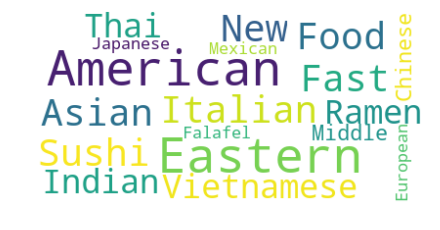


--------- Analyziing Carroll Gardens Neighborhood ----------




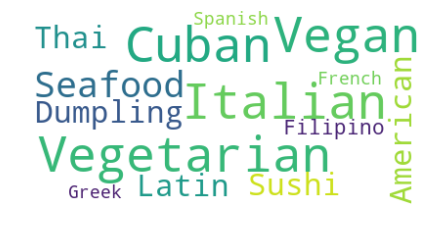


----------- Analyziing Cobble Hill Neighborhood ------------




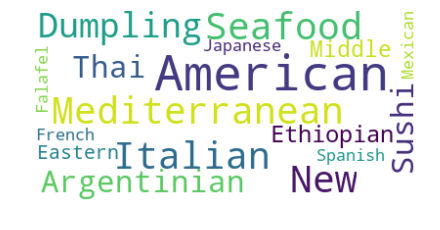


------------- Analyziing Downtown Neighborhood -------------




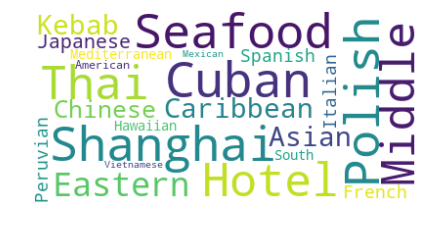


------------ Analyziing Greenpoint Neighborhood ------------




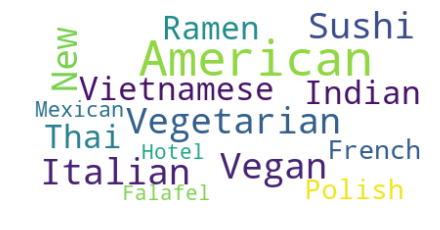


------------ Analyziing North Side Neighborhood ------------




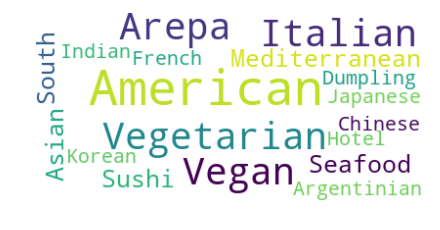


------------ Analyziing South Side Neighborhood ------------




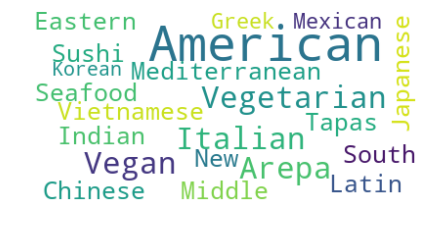

In [33]:
class color:
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

for i,j in df1.iterrows(): 
        word_string_Heading = df1['Neighborhood'][i]
        word_string = df1['Venue Category'][i]
        wordcloud = WordCloud(max_font_size=50, max_words=100,stopwords=stopwords,background_color='white').generate(word_string)
        print("\n"+ color.RED + " Analyziing {} Neighborhood ".format(word_string_Heading).center(60,"-") + color.END + "\n\n")
        # display the cloud
        fig = plt.figure()
        fig.set_figwidth(7)
        fig.set_figheight(9)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()

In [34]:
pivot = pd.pivot_table(brooklyn_venues_final_filter,index=["Neighborhood","Venue Type"], values=["count"],aggfunc=np.sum)
pivot

count
Neighborhood     Venue Type       
Brooklyn Heights Restaurant     22
Carroll Gardens  Restaurant     24
Cobble Hill      Restaurant     25
Downtown         Hotel           2
                 Restaurant     28
Greenpoint       Hotel           1
                 Restaurant     23
North Side       Hotel           1
                 Restaurant     24
South Side       Restaurant     31

### CREATING ONE HOT FILE WITH DUMMY Values  by Venue Category

In [35]:
# one hot encoding
brooklyn_onehot = pd.get_dummies(brooklyn_venues_final_filter[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
brooklyn_onehot['Neighborhood'] = brooklyn_venues_final_filter['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [brooklyn_onehot.columns[-1]] + list(brooklyn_onehot.columns[:-1])
brooklyn_onehot = brooklyn_onehot[fixed_columns]

brooklyn_onehot.shape
brooklyn_onehot.head(25)

,Neighborhood,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Cuban Restaurant,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Greek Restaurant,Hawaiian Restaurant,Hotel,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,New American Restaurant,Peruvian Restaurant,Polish Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Shanghai Restaurant,South American Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Greenpoint,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,Greenpoint,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Greenpoint,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Greenpoint,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Greenpoint,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,Greenpoint,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,Greenpoint,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,Greenpoint,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Greenpoint,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,Greenpoint,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### Grouping the Neighbourghood using means of Frequency of each category

In [37]:
brooklyn_grouped = brooklyn_onehot.groupby('Neighborhood').mean().reset_index()
brooklyn_grouped.head(10)

,Neighborhood,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Cuban Restaurant,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Greek Restaurant,Hawaiian Restaurant,Hotel,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,New American Restaurant,Peruvian Restaurant,Polish Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Shanghai Restaurant,South American Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Brooklyn Heights,0.090909,0.000000,0.00,0.090909,0.000000,0.045455,0.000000,0.000000,0.045455,0.00,0.045455,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.136364,0.045455,0.000000,0.000000,0.000000,0.000000,0.045455,0.045455,0.045455,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.090909,0.000000,0.045455
1,Carroll Gardens,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.041667,0.041667,0.000000,0.00,0.000000,0.000000,0.041667,0.041667,0.041667,0.000000,0.000000,0.000000,0.458333,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.041667,0.000000,0.000000,0.041667,0.041667,0.000000,0.083333,0.041667,0.000000
2,Cobble Hill,0.040000,0.000000,0.04,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.04,0.040000,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.160000,0.080000,0.000000,0.000000,0.000000,0.080000,0.040000,0.080000,0.040000,0.000000,0.000000,0.000000,0.040000,0.040000,0.000000,0.000000,0.040000,0.040000,0.000000,0.080000,0.000000,0.000000
3,Downtown,0.000000,0.000000,0.00,0.066667,0.033333,0.066667,0.033333,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.100000,0.000000,0.033333,0.066667,0.000000,0.033333,0.033333,0.033333,0.000000,0.000000,0.033333,0.033333,0.066667,0.000000,0.033333,0.033333,0.000000,0.033333,0.033333,0.066667,0.033333,0.033333,0.000000,0.000000,0.066667,0.000000,0.033333
4,Greenpoint,0.041667,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.041667,0.000000,0.000000,0.125000,0.000000,0.000000,0.041667,0.041667,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.083333,0.000000,0.083333,0.041667,0.083333,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.041667,0.041667,0.041667
5,North Side,0.120000,0.040000,0.04,0.040000,0.000000,0.080000,0.000000,0.040000,0.000000,0.00,0.000000,0.000000,0.000000,0.080000,0.000000,0.000000,0.040000,0.040000,0.040000,0.040000,0.000000,0.040000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080000,0.000000,0.080000,0.000000,0.040000,0.000000,0.000000,0.120000,0.000000
6,South Side,0.129032,0.032258,0.00,0.000000,0.000000,0.096774,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,0.032258,0.032258,0.064516,0.000000,0.064516,0.032258,0.032258,0.064516,0.032258,0.032258,0.000000,0.000000,0.000000,0.032258,0.064516,0.000000,0.064516,0.000000,0.032258,0.032258,0.000000,0.064516,0.032258


In [38]:
brooklyn_grouped.shape

(7, 41)

### Exploring each Neighbourhood along with the top 5 Common Restaurants/Hotels

In [39]:
num_top_RestHtl = 10

for Nghhood in brooklyn_grouped['Neighborhood']:
    print("----"+Nghhood+"----")
    temp = brooklyn_grouped[brooklyn_grouped['Neighborhood'] == Nghhood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_RestHtl))
    print('\n')

----Brooklyn Heights----
                       venue  freq
0         Italian Restaurant  0.14
1        American Restaurant  0.09
2          Indian Restaurant  0.09
3            Thai Restaurant  0.09
4           Asian Restaurant  0.09
5           Sushi Restaurant  0.05
6           Ramen Restaurant  0.05
7    New American Restaurant  0.05
8  Middle Eastern Restaurant  0.05
9         Mexican Restaurant  0.05


----Carroll Gardens----
                       venue  freq
0         Italian Restaurant  0.46
1            Thai Restaurant  0.08
2         Seafood Restaurant  0.04
3         Spanish Restaurant  0.04
4                 Restaurant  0.04
5           Greek Restaurant  0.04
6          French Restaurant  0.04
7        Filipino Restaurant  0.04
8  Latin American Restaurant  0.04
9        Dumpling Restaurant  0.04


----Cobble Hill----
                       venue  freq
0         Italian Restaurant  0.16
1   Mediterranean Restaurant  0.08
2  Middle Eastern Restaurant  0.08
3            Thai

### SORTING THE VENUS IN THE DESCENDING ORDER

In [40]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [43]:
num_top_RestHtl = 5 

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_RestHtl):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = brooklyn_grouped['Neighborhood']

for ind in np.arange(brooklyn_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(brooklyn_grouped.iloc[ind, :], num_top_RestHtl)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Brooklyn Heights,Italian Restaurant,American Restaurant,Thai Restaurant,Asian Restaurant,Indian Restaurant
1,Carroll Gardens,Italian Restaurant,Thai Restaurant,Cuban Restaurant,Restaurant,French Restaurant
2,Cobble Hill,Italian Restaurant,Japanese Restaurant,Thai Restaurant,French Restaurant,Mediterranean Restaurant
3,Downtown,French Restaurant,Thai Restaurant,Asian Restaurant,Chinese Restaurant,Shanghai Restaurant
4,Greenpoint,French Restaurant,Mexican Restaurant,New American Restaurant,Sushi Restaurant,Italian Restaurant
5,North Side,American Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,South American Restaurant,Seafood Restaurant
6,South Side,American Restaurant,Chinese Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant


### Clustering the Brooklyn Neighbourhood using K-means

In [45]:
#Run k-means to cluster the neighborhood into 10 clusters.
# set number of clusters
kclusters = 5

brooklyn_grouped_clustering = brooklyn_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(brooklyn_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
#brooklyn_venues_final_4Kmeans=brooklyn_venues_final.drop(["Venue Latitude","Venue Longitude","count"],axis=1)
#brooklyn_venues_final_4Kmeans
#neighborhoods_venues_sorted
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Brooklyn Heights,Italian Restaurant,American Restaurant,Thai Restaurant,Asian Restaurant,Indian Restaurant
1,Carroll Gardens,Italian Restaurant,Thai Restaurant,Cuban Restaurant,Restaurant,French Restaurant
2,Cobble Hill,Italian Restaurant,Japanese Restaurant,Thai Restaurant,French Restaurant,Mediterranean Restaurant
3,Downtown,French Restaurant,Thai Restaurant,Asian Restaurant,Chinese Restaurant,Shanghai Restaurant
4,Greenpoint,French Restaurant,Mexican Restaurant,New American Restaurant,Sushi Restaurant,Italian Restaurant
5,North Side,American Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,South American Restaurant,Seafood Restaurant
6,South Side,American Restaurant,Chinese Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant


In [46]:
#Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
brooklyn_merged = brooklyn_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
brooklyn_merged = brooklyn_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood', how='inner') 
brooklyn_merged 




,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,Brooklyn,Greenpoint,40.730201,-73.954241,0,French Restaurant,Mexican Restaurant,New American Restaurant,Sushi Restaurant,Italian Restaurant
18,Brooklyn,Brooklyn Heights,40.695864,-73.993782,3,Italian Restaurant,American Restaurant,Thai Restaurant,Asian Restaurant,Indian Restaurant
19,Brooklyn,Cobble Hill,40.687920,-73.998561,3,Italian Restaurant,Japanese Restaurant,Thai Restaurant,French Restaurant,Mediterranean Restaurant
20,Brooklyn,Carroll Gardens,40.680540,-73.994654,2,Italian Restaurant,Thai Restaurant,Cuban Restaurant,Restaurant,French Restaurant
40,Brooklyn,Downtown,40.690844,-73.983463,4,French Restaurant,Thai Restaurant,Asian Restaurant,Chinese Restaurant,Shanghai Restaurant
50,Brooklyn,North Side,40.714823,-73.958809,1,American Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,South American Restaurant,Seafood Restaurant
51,Brooklyn,South Side,40.710861,-73.958001,1,American Restaurant,Chinese Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant


In [47]:
#visualize the resulting clusters
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(brooklyn_merged ['Latitude'], brooklyn_merged ['Longitude'], brooklyn_merged ['Neighborhood'], brooklyn_merged ['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [48]:
# Examining the Clusters
# Cluster = 
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 0, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,Greenpoint,French Restaurant,Mexican Restaurant,New American Restaurant,Sushi Restaurant,Italian Restaurant


In [49]:
# Examining the Clusters
# Cluster = 1
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 1, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
50,North Side,American Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,South American Restaurant,Seafood Restaurant
51,South Side,American Restaurant,Chinese Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant


In [50]:
# Examining the Clusters
# Cluster = 2
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 2, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
20,Carroll Gardens,Italian Restaurant,Thai Restaurant,Cuban Restaurant,Restaurant,French Restaurant


In [51]:
# Examining the Clusters
# Cluster = 3
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 3, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
18,Brooklyn Heights,Italian Restaurant,American Restaurant,Thai Restaurant,Asian Restaurant,Indian Restaurant
19,Cobble Hill,Italian Restaurant,Japanese Restaurant,Thai Restaurant,French Restaurant,Mediterranean Restaurant


In [52]:
# Examining the Clusters
# Cluster = 4
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 4, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
40,Downtown,French Restaurant,Thai Restaurant,Asian Restaurant,Chinese Restaurant,Shanghai Restaurant
